<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/03_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits, load_wine, load_diabetes

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_metric, plot_tree
import lightgbm as lgb

import graphviz



In [1]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,557 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [2]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
pip install mglearn

     |████████████████████████████████| 542kB 7.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=346530c39f4cc48d23570e2ba7d6dc818cc28b706d9bd47124a1feec16a2f13b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# 1. Decision Tree
- 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
- 설명하기 좋은 알고리즘
- 과적합 문제
- 균일도 측정 방식
    - entropy를 이용한 Information Gain 지수(ID3알고리즘)
    - gini 계수 : 0(평등) -> 1(불평등) (지니계수가 작을수록 좋다)

- Graphviz
    - http://www.graphviz.org
    - pip install graphviz

In [ ]:
# 내 컴퓨터에서 실행할때만 사용
import os

os.environ["PATH"] += os.pathsep + "C:\ 경로"

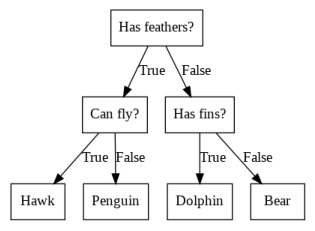

In [ ]:
mglearn.plots.plot_animal_tree()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


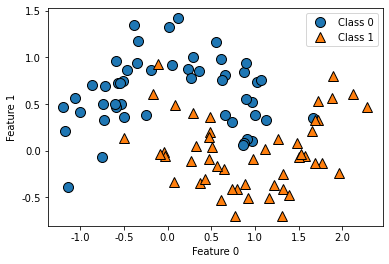

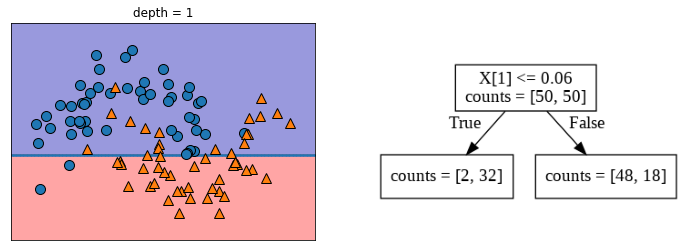

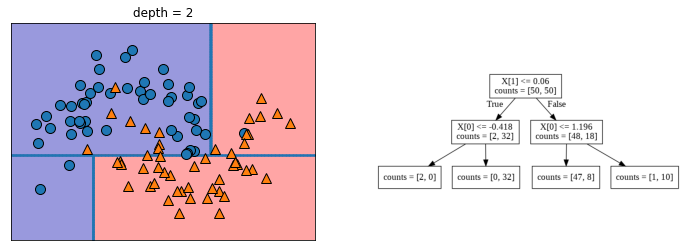

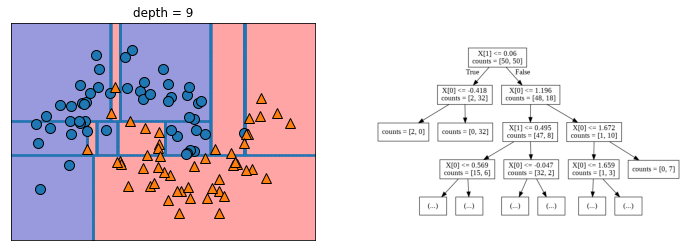

In [ ]:
mglearn.plots.plot_tree_progressive()

### (1) 간단한 예

In [ ]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='/content/drive/My Drive/Colab Notebooks/Data/tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

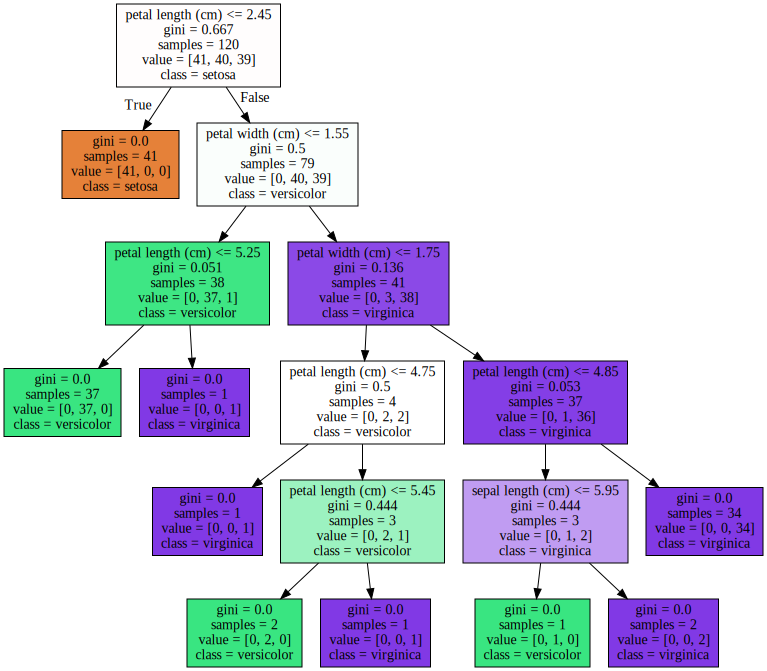

In [ ]:
import graphviz

f = open('/content/drive/My Drive/Colab Notebooks/Data/tree.dot')
dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
print("훈련 정확도 :", dt_clf.score(X_train, y_train))
print("테스트 정확도 :", dt_clf.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.8666666666666667


### (2) 복잡도 제어 : Prunning(가지치기)

- 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원

- 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - max_depth
    - max_leaf_nodes

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

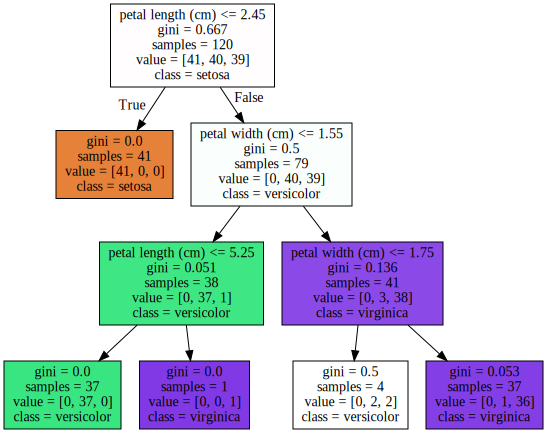

In [ ]:
##### max_depth
dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='/content/drive/My Drive/Colab Notebooks/Data/tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

f = open('/content/drive/My Drive/Colab Notebooks/Data/tree.dot')
dot_graph = f.read()

graphviz.Source(dot_graph)

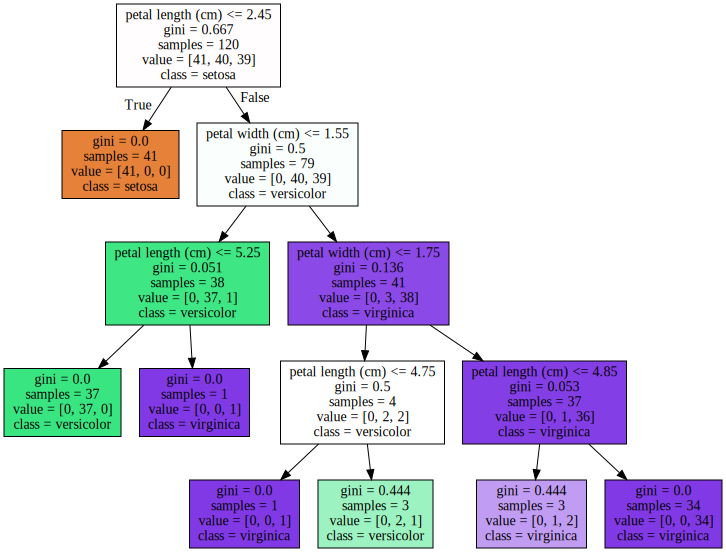

In [ ]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='/content/drive/My Drive/Colab Notebooks/Data/tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

f = open('/content/drive/My Drive/Colab Notebooks/Data/tree.dot')
dot_graph = f.read()

graphviz.Source(dot_graph)

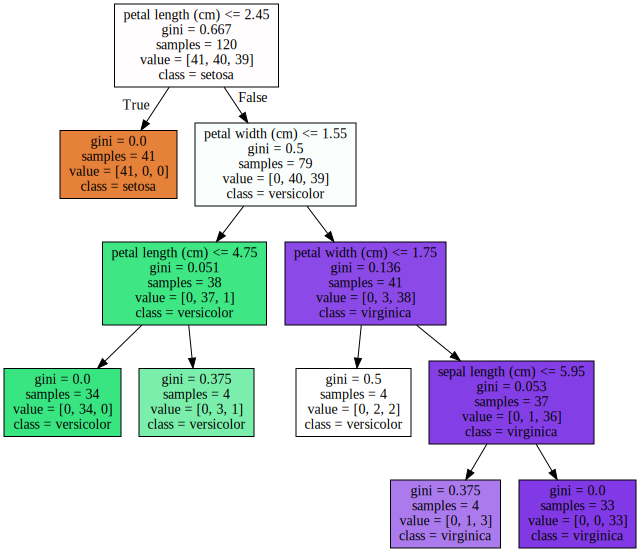

In [ ]:
##### min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='/content/drive/My Drive/Colab Notebooks/Data/tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, filled=True)

f = open('/content/drive/My Drive/Colab Notebooks/Data/tree.dot')
dot_graph = f.read()

graphviz.Source(dot_graph)

### (3) Feature Importance 시각화

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

Feature Importances:
[0.006 0.    0.546 0.448]

sepal length (cm): 0.006
sepal width (cm): 0.000
petal length (cm): 0.546
petal width (cm): 0.448


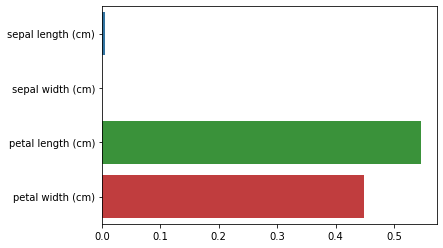

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [ ]:
print("훈련 정확도 :", dt_clf.score(X_train, y_train))
print("테스트 정확도 :", dt_clf.score(X_test, y_test))

훈련 정확도 : 0.9666666666666667
테스트 정확도 : 0.9333333333333333


##### breast_cancer sample

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify = cancer.target, random_state = 42)


In [ ]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [ ]:
print("훈련 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.9370629370629371


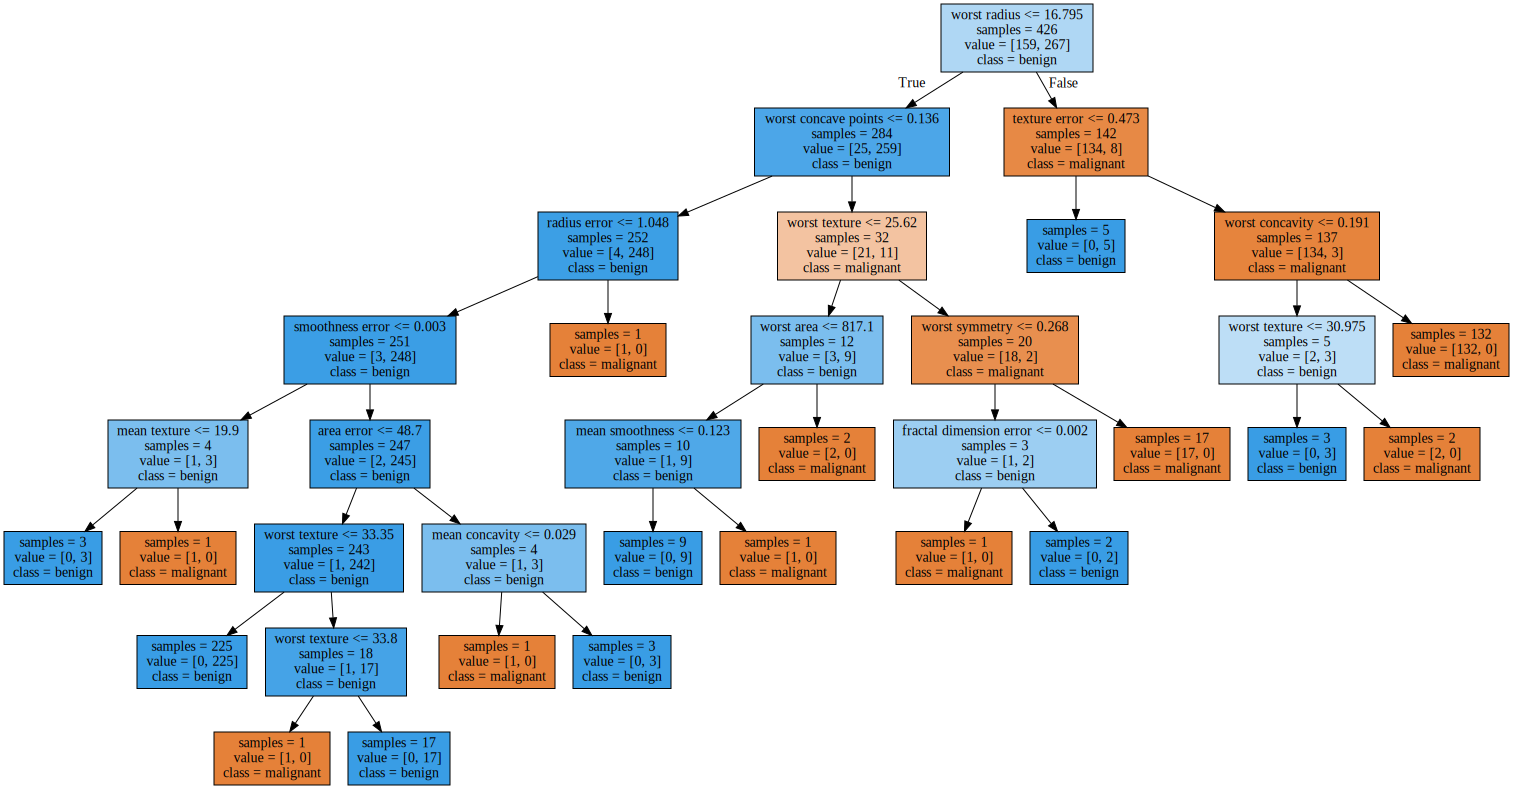

In [ ]:
export_graphviz(tree, out_file='/content/drive/My Drive/Colab Notebooks/Data/tree.dot', class_names=cancer.target_names, feature_names=cancer.feature_names, filled=True, impurity=False)

f = open('/content/drive/My Drive/Colab Notebooks/Data/tree.dot')
dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
# print(tree.feature_importances_)
# print(cancer.feature_names)
for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.007525969896120416
mean perimeter 0.0
mean area 0.0
mean smoothness 0.009031163875344502
mean compactness 0.0
mean concavity 0.007525969896120416
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.009757314709226458
texture error 0.04630969310672634
perimeter error 0.0
area error 0.0023874473180847578
smoothness error 0.002311353379659695
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.006689751018773702
worst radius 0.6954632181471274
worst texture 0.05383210641368679
worst perimeter 0.0
worst area 0.013546745813016745
worst smoothness 0.0
worst compactness 0.0
worst concavity 0.01740311870869308
worst concave points 0.11684357098550442
worst symmetry 0.011372576731915298
worst fractal dimension 0.0


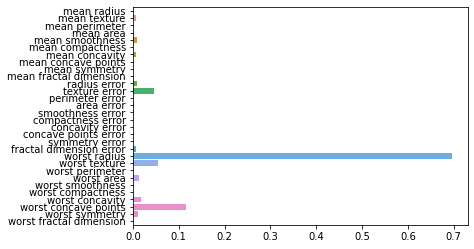

In [ ]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

##### 2) 특성 중요도를 통해 추출한 특성만을 사용했을 때 성능 개선 효과

In [ ]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

print("훈련 정확도 :", dt_clf.score(X_train, y_train))
print("테스트 정확도 :", dt_clf.score(X_test, y_test))

훈련 정확도 : 0.9821428571428571
테스트 정확도 : 0.9736842105263158


In [ ]:
sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train_std, y_train)

print("훈련 정확도 :", dt_clf.score(X_train_std, y_train))
print("테스트 정확도 :", dt_clf.score(X_test_std, y_test))

# 정규화를 해도 tree성능에는 차이가 없다

훈련 정확도 : 0.9821428571428571
테스트 정확도 : 0.9736842105263158


### (4) 사례1 : 서울 지역 동 분류
- 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [ ]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [ ]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]


In [ ]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [ ]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [ ]:
##### 현재 가지고 있는 데이터에서 레이블의 갯수 확인
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangdong    5
Gangbuk     5
Gangseo     5
Gangnam     5
Name: label, dtype: int64
Gangdong    5
Gangbuk     5
Gangseo     5
Gangnam     5
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


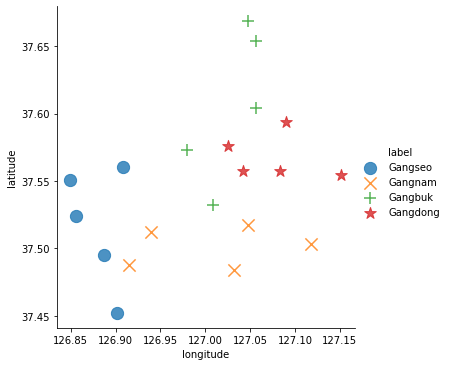

In [ ]:
##### 데이터 시각화

sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False, markers=["o", "x", "+", "*"], hue="label", scatter_kws={"s":150})

In [ ]:
##### 구 이름과 동 이름을 삭제

train_df.drop(["district"], axis = 1, inplace = True)
test_df.drop(["dong"], axis = 1, inplace = True)

In [ ]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [ ]:
X_train = train_df[["latitude", "longitude"]]
y_train = train_df["label"]

X_test = test_df[["latitude", "longitude"]]
y_test = test_df["label"]

In [ ]:
##### Label값을 숫자로 변환

le = LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [ ]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


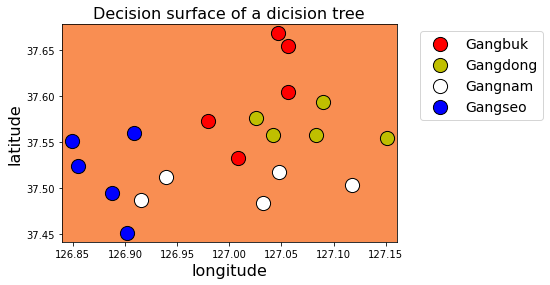

In [ ]:
display_decision_surface(clf, X_train, y_encode)

In [ ]:
pred = clf.predict(X_test)
print("정확도 :", accuracy_score(y_test.values, le.classes_[pred]))

정확도 : 1.0


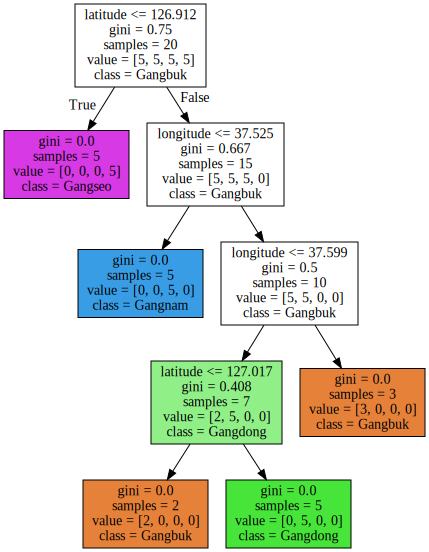

In [ ]:
graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"], feature_names=["longitude", "latitude"], filled=True, impurity=True)

graphviz.Source(graph)

# 2. RandomForest

- 앙상블(Ensemble)
    - vote 방식
        - Soft Voting
        - Hard Voting

    - 종류
        - Voting
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합

        - Bagging
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            - RandomForest

        - Boosting
            - 여러 개의 분류기가 순차적으로 학습을 하되 앞에서 학습한 분류기가 틀린 데이터에서 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - XGBoost, Light GBM, Stacking, ...

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=y)

In [ ]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)


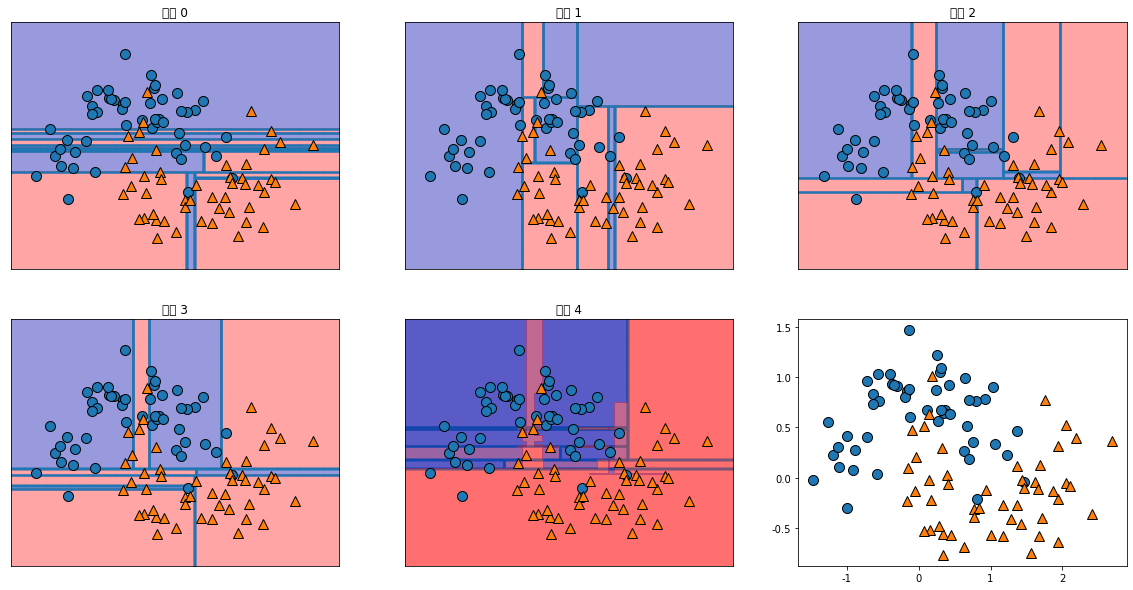

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, 1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### (1) DecisionTree vs. RandomForest

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=y)

In [ ]:
model1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 :", model1.score(X_train, y_train))
print("테스트 정확도 :", model1.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.76


In [ ]:
model1 = RandomForestClassifier(random_state=0, n_estimators=5).fit(X_train, y_train)

print("훈련 정확도 :", model1.score(X_train, y_train))
print("테스트 정확도 :", model1.score(X_test, y_test))

훈련 정확도 : 0.9953051643192489
테스트 정확도 : 0.9440559440559441


In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

-----

In [ ]:
model1 = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

print("훈련 정확도 :", model1.score(X_train, y_train))
print("테스트 정확도 :", model1.score(X_test, y_test))

훈련 정확도 : 0.9765258215962441
테스트 정확도 : 0.9370629370629371


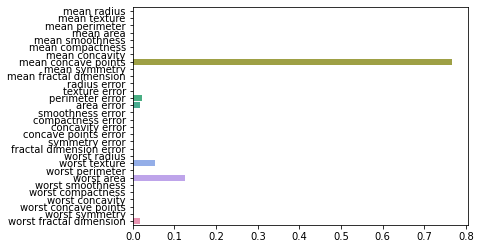

In [ ]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [ ]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 정확도 :", model2.score(X_train, y_train))
print("테스트 정확도 :", model2.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.972027972027972


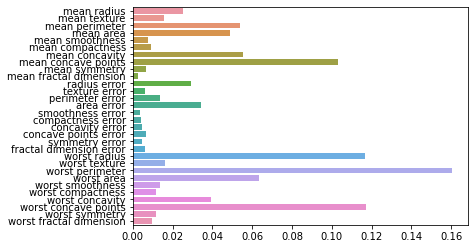

In [ ]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

---


In [ ]:
mnist = load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
##### 교차 검증을 위한 공용 함수

def cross_validation(clf, features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())

    return cv_scores

In [ ]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

In [ ]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.827137181874612
0.9493547486033519


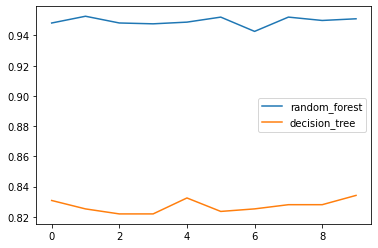

In [ ]:
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df
df.plot()

### (2) 사례 : 독버섯 데이터
- https://archive.ics.uci.edu/ml/datasets/mushroom
    - agaricus-lepiota.data
- 파일명을 "mushrooms.csv"로 변경

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import urllib.request as req

savedir = '/content/drive/My Drive/Colab Notebooks/Data/mushroom1.csv'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료


In [6]:
mr = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/mushroom1.csv", header = None)
print(mr.shape)
mr.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [7]:
##### 결측치 여부

mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [8]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
##### feature와 label을 분리

X = mr.drop(0, axis=1)
y = mr[0]

In [10]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [14]:
##### feature들의 숫자화

enc_x = LabelEncoder()

for col in X.columns:
    X[col] = enc_x.fit_transform(X[col])

enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

In [15]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
random_clf = RandomForestClassifier().fit(X_train, y_train)
pred = random_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1101
           1       1.00      1.00      1.00       930

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [24]:
##### DecisionTree

decision_clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = decision_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1101
           1       1.00      1.00      1.00       930

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [25]:
##### KNN

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1101
           1       1.00      1.00      1.00       930

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [26]:
##### LogisticRegression

lr_clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1101
           1       0.95      0.95      0.95       930

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [27]:
##### LogisticRegression

lr_clf = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1101
           1       0.96      0.98      0.97       930

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



### (3) 사례2 : 사용자 행동 인식 데이터셋
- https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#pd.read_csv로 csv파일 불러오기
feature_name_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/features.txt', sep="\s+", names=["column_index", "column_name"])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
##### 인덱스를 없애고 피처명만 리스트로 생성

feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [6]:
feature_dup_df = feature_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df["column_index"] > 1].count())
feature_dup_df[feature_dup_df["column_index"] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [7]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [8]:
# pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df["dup_cnt"] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [12]:
def get_human_dataset():
    feature_name_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/features.txt', sep="\s+",header=None, names=["column_index", "column_name"])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/X_train.txt', sep="\s+", names=feature_name)
    X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/X_test.txt', sep="\s+", names=feature_name)

    y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/y_train.txt', sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/의사결정나무/y_test.txt', sep="\s+", header=None, names=["action"])

    return X_train, X_test, y_train, y_test

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

# # 데이터셋을 구성하는 함수 설정
# def get_human_dataset():
    
#     # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
#     feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+',
#                                                      header=None, names=['column_index', 'column_name'])
#     # 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환
#     feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
#     # 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
#     # 컬럼명은 feature_name 적용
#     X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', names=feature_name)
#     X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
#     # 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
#     y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', names=['action'])
#     y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', names=['action'])
    
#     # 로드된 학습/테스트용 데이터프레임을 모두 반환
#     return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [15]:
y_train

,action
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [16]:
##### 결측치 확인

X_train.isnull().sum().sum()

0

#### 1) Decicion Tree

In [17]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("정확도 :", accuracy)

정확도 : 0.8547675602307431


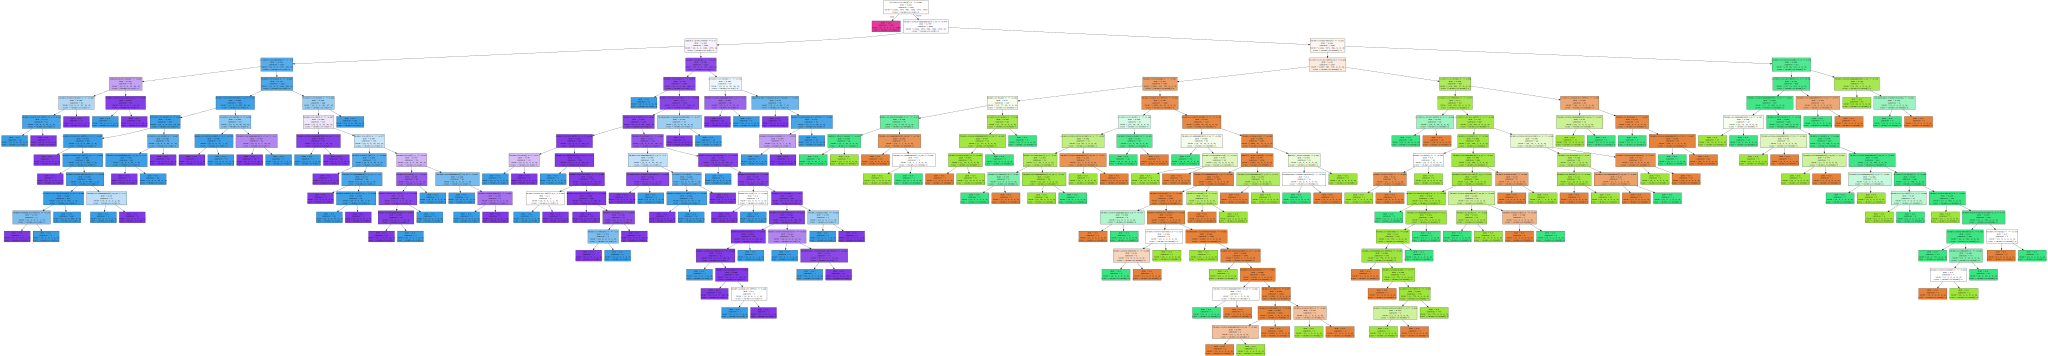

In [20]:
graph = export_graphviz(dt_clf, out_file=None, class_names=feature_name, feature_names = feature_name, filled=True, impurity=True)

graphviz.Source(graph)

# 3. GradientBoostingModel
- 분류와 회귀에서 모두 사용 가능
- 이전 트리와 오차를 보완하는 방식으로 트리 생성(경사하강법(Gradient Descent Algorithm)
- 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공
- learning_rate 파라미터를 사용하여 오차 보정
- XG Boost, LightGBM, ...

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

In [4]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.958041958041958


In [5]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

훈련 정확도 : 0.9906103286384976
테스트 정확도 : 0.965034965034965


In [6]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

훈련 정확도 : 0.9929577464788732
테스트 정확도 : 0.958041958041958


훈련 정확도 : 0.9906103286384976
테스트 정확도 : 0.965034965034965


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


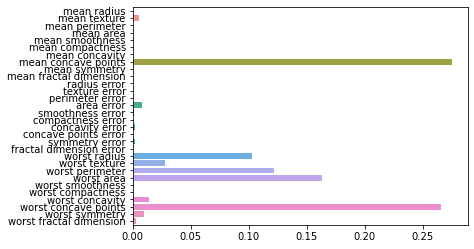

In [7]:
##### 특성 중요도

tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

In [8]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=y)

In [9]:
##### RandomForest 기본값 확인

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict(X_test)

print("훈련 정확도 :", clf.score(X_train, y_train))
print("테스트 정확도 :", clf.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.936


In [10]:
params = {
    "n_estimators":[100, 200, 300],
    "max_depth":[2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf":[1, 2, 3, 4, 5],
    "min_samples_split":[4, 8, 10, 11, 12, 13, 14]
}

clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf2, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                     

In [11]:
print("최적의 파라미터 :", grid_cv.best_params_)
print("최고 예측 정확도 :", grid_cv.best_score_)

최적의 파라미터 : {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도 : 0.9453333333333334


In [12]:
##### GradientBoostingModel 기본값 확인

clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

clf3.predict(X_test)

print("훈련 정확도 :", clf3.score(X_train, y_train))
print("테스트 정확도 :", clf3.score(X_test, y_test))

훈련 정확도 : 0.988
테스트 정확도 : 0.932


In [13]:
params = {
    "n_estimators":[100, 200, 300],
    "max_depth":[2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf":[1, 2, 3, 4, 5],
    "min_samples_split":[4, 8, 10, 11, 12, 13, 14],
    "learning_rate":[0.1, 0.01, 0.001, 1]
}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [14]:
print("훈련 정확도 :", grid_cv.score(X_train, y_train))
print("테스트 정확도 :", grid_cv.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.928


### XGBoost
- 트리 기반의 앙상블 기법
- 분류에 있어서는 다른 알고리즘보다 좋은 예측 성능을 보여줌
- XGBoost는 GBM기반이지만, GBM의 단점인 느린 수행과 과적합 규제 부재 등의 문제를 해경
- 병렬 CPU환경에서 빠르게 학습 가능

#### 1) xgboost

In [20]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2, random_state = 123)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [23]:
params = {
    "max_depth":3,
    "eta":0.1,
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "early_stopping":100
}

num_rounds = 400

evals = [(dtrain, "train"), (dtest, "eval")]

In [28]:
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.609436	eval-logloss:0.610101
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.54047	eval-logloss:0.540739
[2]	train-logloss:0.482113	eval-logloss:0.484899
[3]	train-logloss:0.433652	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.353717	eval-logloss:0.362107
[6]	train-logloss:0.322225	eval-logloss:0.329962
[7]	train-logloss:0.292921	eval-logloss:0.301791
[8]	train-logloss:0.267307	eval-logloss:0.278011
[9]	train-logloss:0.244087	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.240372
[11]	train-logloss:0.208073	eval-logloss:0.222709
[12]	train-logloss:0.191772	eval-logloss:0.207948
[13]	train-logloss:0.17746	eval-logloss:0.195312
[14]	train-logloss:0.164082	eval-logloss:0.184597
[15]	train-logloss:0.152497	eval-logloss:0.171834
[16]	train-logloss:0.141981	eval-logloss:0.161516
[17]	train-loglos

In [31]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [33]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])
print(y_test[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[1 1 0 1 0 1 1 0 1 1]


In [34]:
from sklearn.metrics import precision_score, recall_score

print("정확도 :", accuracy_score(y_test, preds))
print("정밀도 :", precision_score(y_test, preds))
print("재현율 :", recall_score(y_test, preds))

정확도 : 0.9736842105263158
정밀도 : 0.972972972972973
재현율 : 0.9863013698630136


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


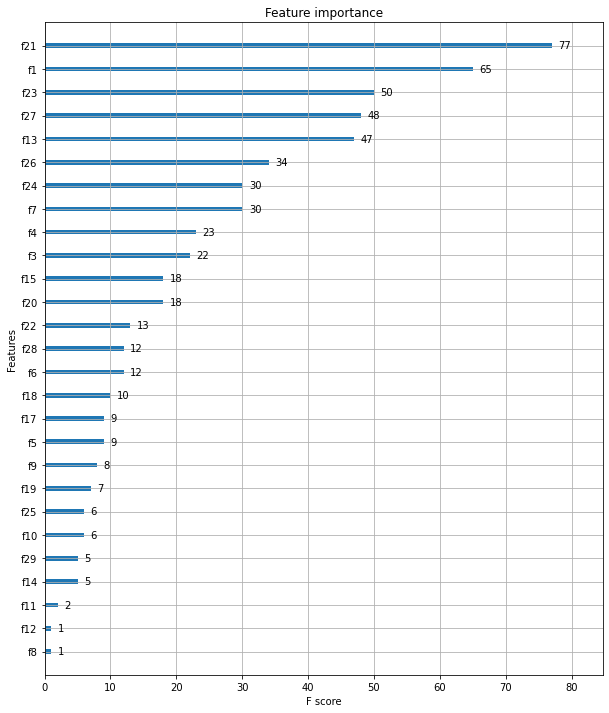

In [35]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

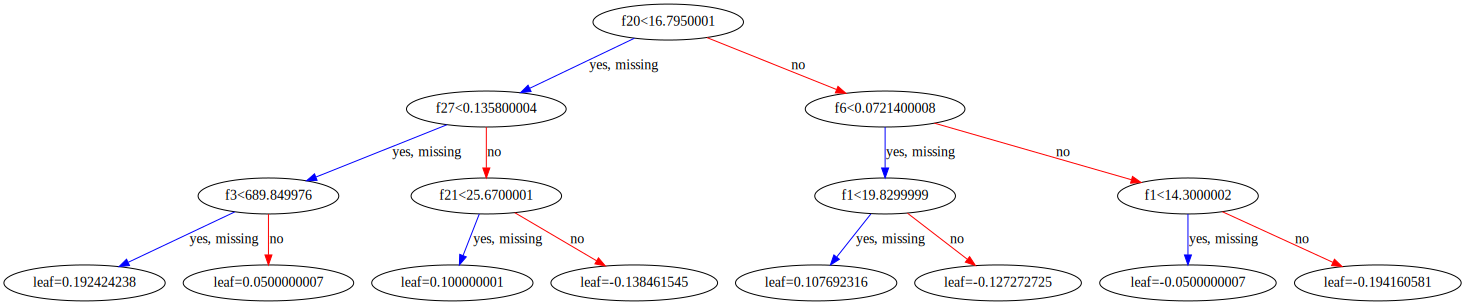

In [36]:
graphviz.Source(xgb.to_graphviz(xgb_model))

#### 2) XGBClassifier
- 붓꽃 데이터 샘플

In [6]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=123)

In [7]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

preds = xgbc.predict(X_test)
# pred_proba = xgbc.predict_proba(X_test)[:, 1]
# print(pred_proba)

print("훈련 정확도 :", xgbc.score(X_train, y_train))
print("테스트 정확도 :", xgbc.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.9666666666666667


In [14]:
cross_val = cross_validate(estimator=xgbc, X=iris.data, y=iris.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.08100423812866211 (+/-0.006828235469996534)
avg score time : 0.0009014129638671875 (+/-0.00010441257424704097)
avg test time : 0.96 (+/-0.024944382578492935)


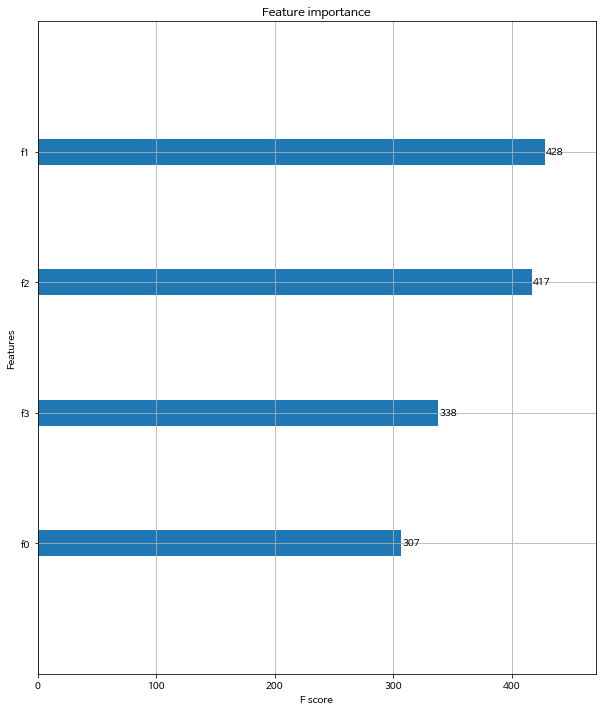

In [15]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

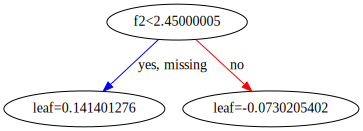

In [16]:
graphviz.Source(xgb.to_graphviz(xgbc))

- Wine 데이터 샘플

In [30]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.2, random_state=123)

In [31]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

preds = xgbc.predict(X_test)
# pred_proba = xgbc.predict_proba(X_test)[:, 1]
# print(pred_proba)

print("훈련 정확도 :", xgbc.score(X_train, y_train))
print("테스트 정확도 :", xgbc.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 1.0


In [32]:
cross_val = cross_validate(estimator=xgbc, X=wine.data, y=wine.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.11092572212219239 (+/-0.008454351958167057)
avg score time : 0.0009226322174072266 (+/-5.781174178014904e-05)
avg test time : 0.9609523809523809 (+/-0.028267341226138717)


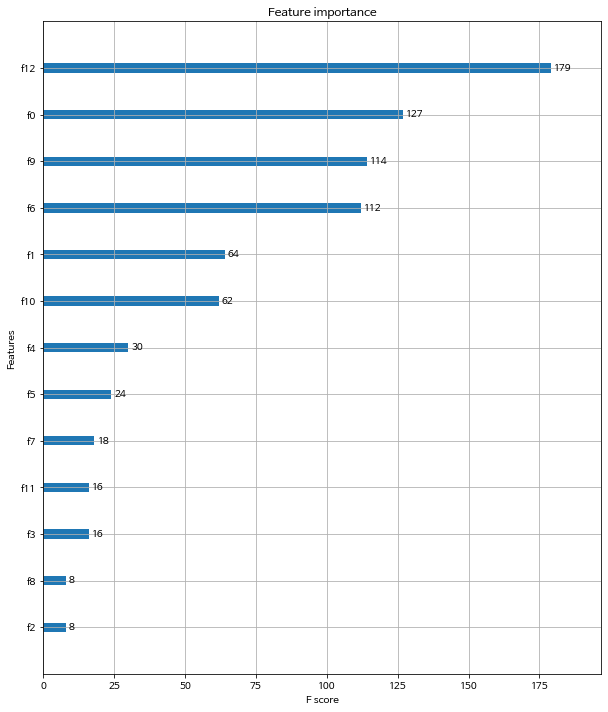

In [33]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

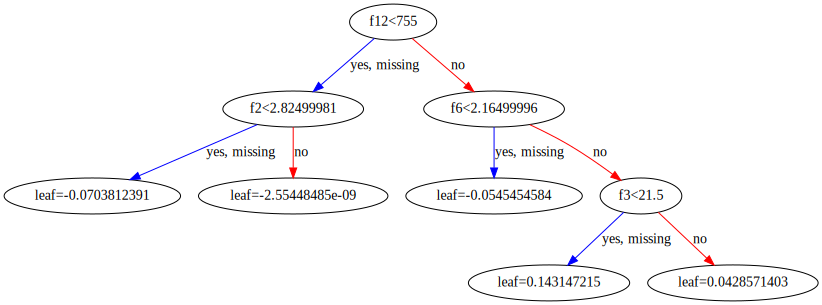

In [34]:
graphviz.Source(xgb.to_graphviz(xgbc))

- brest_cancer 데이터 샘플

In [35]:
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.2, random_state=123)

In [36]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

preds = xgbc.predict(X_test)
# pred_proba = xgbc.predict_proba(X_test)[:, 1]
# print(pred_proba)

print("훈련 정확도 :", xgbc.score(X_train, y_train))
print("테스트 정확도 :", xgbc.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.9736842105263158


In [37]:
cross_val = cross_validate(estimator=xgbc, X=breast_cancer.data, y=breast_cancer.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.2050088405609131 (+/-0.0073374507595364725)
avg score time : 0.0014119148254394531 (+/-0.00015638652288690793)
avg test time : 0.9736376339077782 (+/-0.009609619188189153)


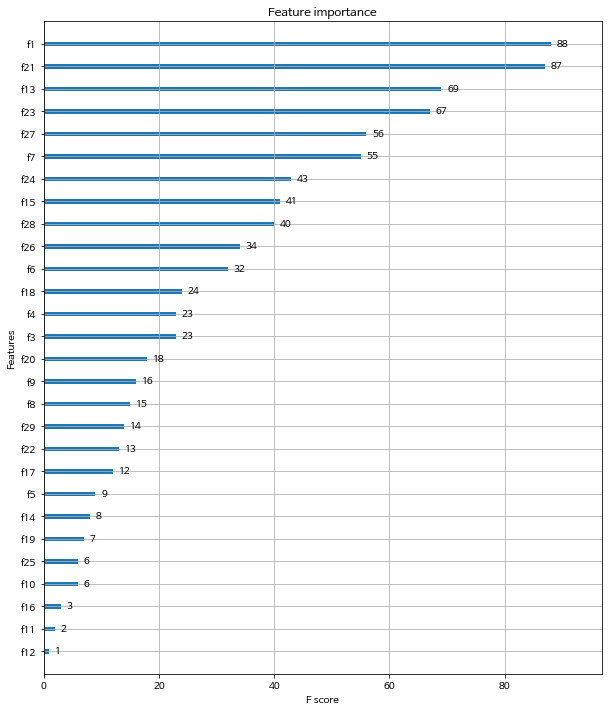

In [38]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

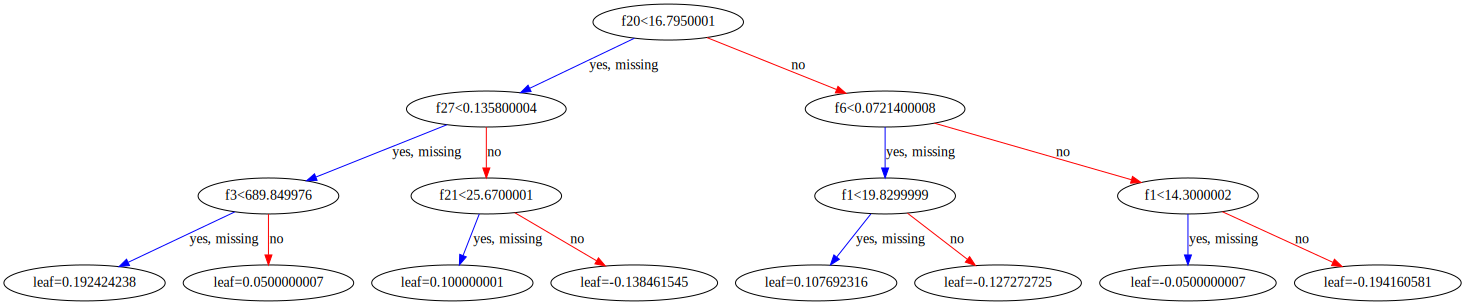

In [39]:
graphviz.Source(xgb.to_graphviz(xgbc))

#### 3) XGBRegressor

In [43]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state=123)

In [44]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

preds = xgbr.predict(X_test)
# pred_proba = xgbc.predict_proba(X_test)[:, 1]
# print(pred_proba)

print("훈련 정확도 :", xgbr.score(X_train, y_train))
print("테스트 정확도 :", xgbr.score(X_test, y_test))

훈련 정확도 : 0.9972630293368604
테스트 정확도 : 0.8151645315914433


In [94]:
cross_val = cross_validate(estimator=xgbr, X=boston.data, y=boston.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.14627490043640137 (+/-0.0049879547312145465)
avg score time : 0.002095651626586914 (+/-0.0001516293728852627)
avg test score : 0.6884390572208088 (+/-0.164997474845101)


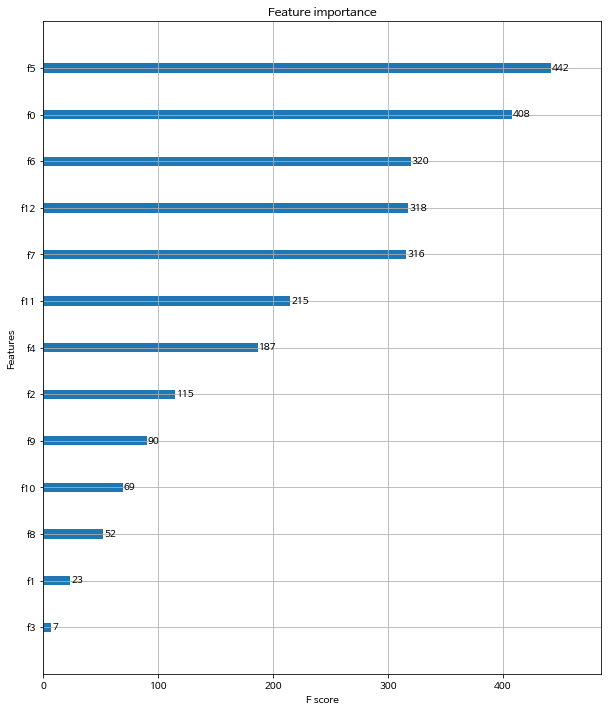

In [46]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax)

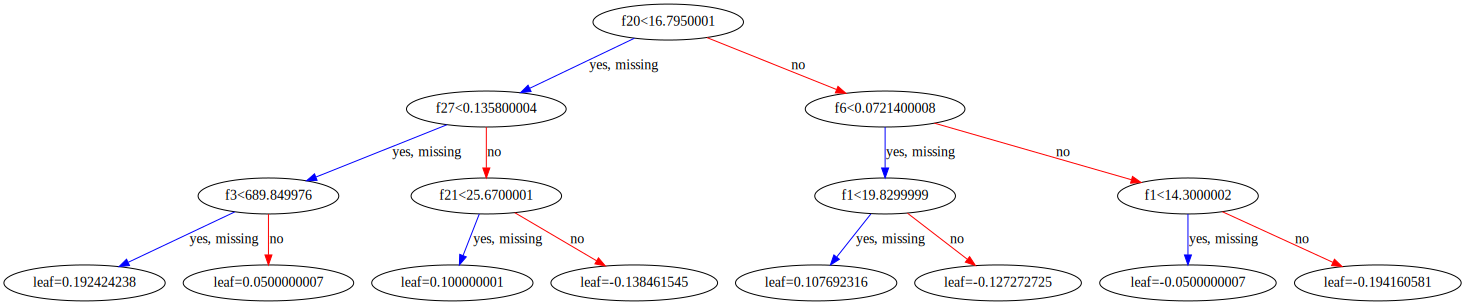

In [47]:
graphviz.Source(xgb.to_graphviz(xgbc))

- 당뇨병 데이터

In [48]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state=123)

In [49]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

preds = xgbr.predict(X_test)
# pred_proba = xgbc.predict_proba(X_test)[:, 1]
# print(pred_proba)

print("훈련 정확도 :", xgbr.score(X_train, y_train))
print("테스트 정확도 :", xgbr.score(X_test, y_test))

훈련 정확도 : 0.9679522983721685
테스트 정확도 : 0.4547084852793414


In [93]:
cross_val = cross_validate(estimator=xgbr, X=diabetes.data, y=diabetes.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.12053446769714356 (+/-0.0035721173725470866)
avg score time : 0.0018990039825439453 (+/-0.00011686771939019098)
avg test score : 0.3000529025802777 (+/-0.07589311710543882)


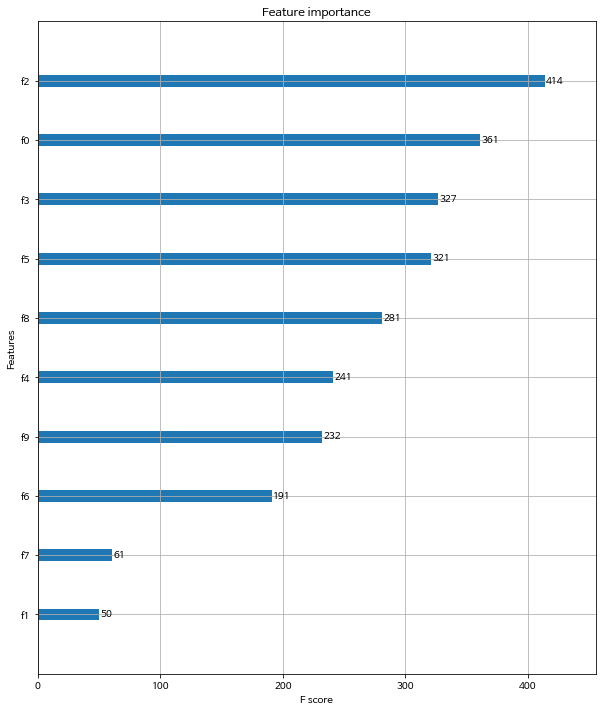

In [52]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax)

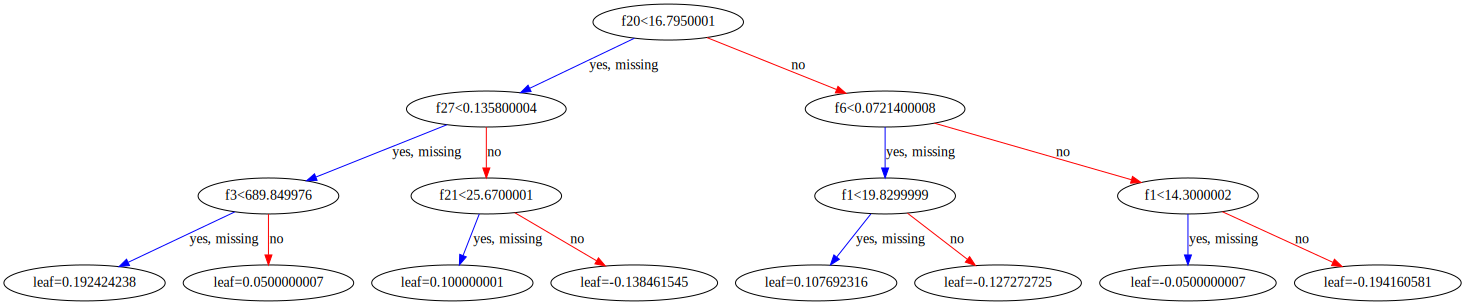

In [53]:
graphviz.Source(xgb.to_graphviz(xgbc))

### LightGBM
- 빠른 학습과 예측 시간
- 더 적은 메모리 사용
- 범주형 특징의 자동 변환과 최적 분할

#### 1) LGBMClassifier

In [59]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

In [92]:
cross_val = cross_validate(estimator=lgbmc, X=iris.data, y=iris.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.05735311508178711 (+/-0.0022371579336774366)
avg score time : 0.0011961936950683593 (+/-5.8909250686113355e-05)
avg test score : 0.9533333333333335 (+/-0.06182412330330468)


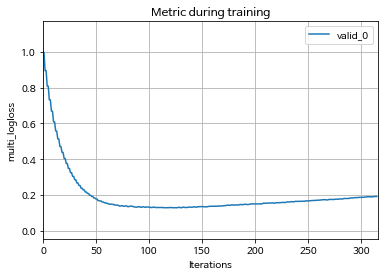

In [63]:
plot_metric(lgbmc)

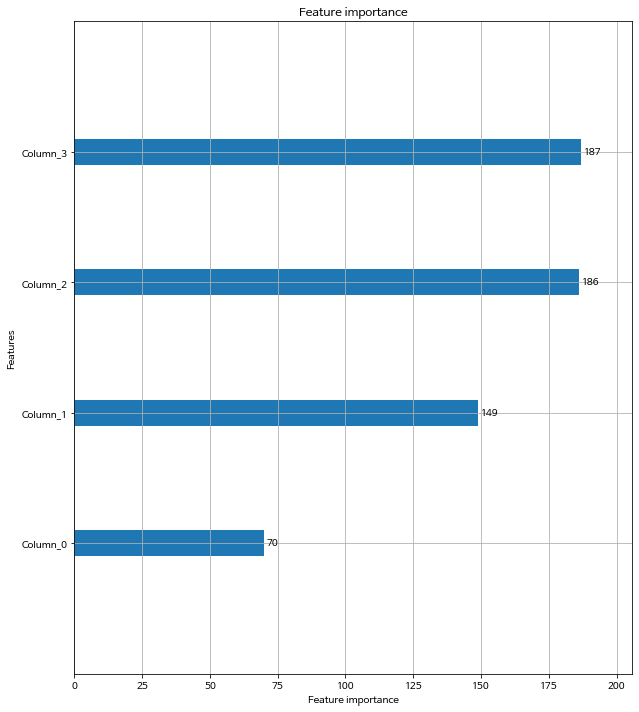

In [64]:
plot_importance(lgbmc, figsize=(10, 12))

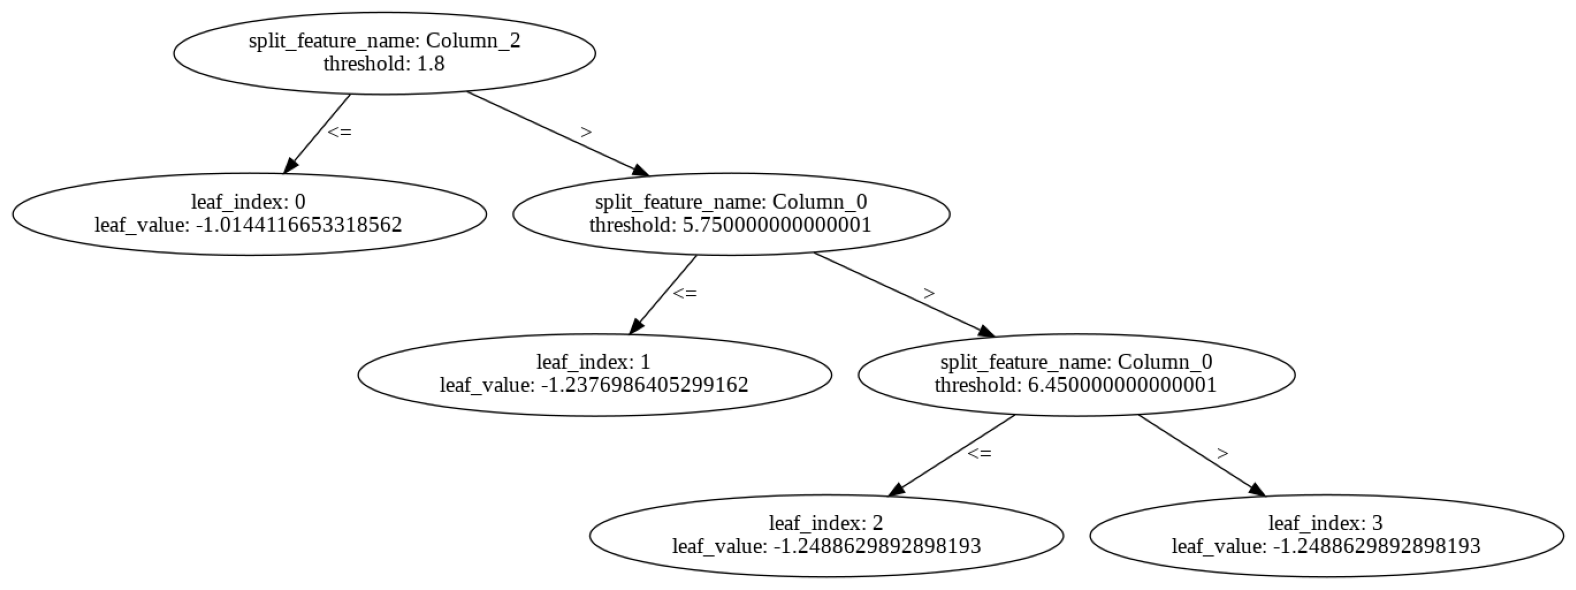

In [66]:
plot_tree(lgbmc, figsize=(28, 24))

- Wine 데이터

In [68]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

In [91]:
cross_val = cross_validate(estimator=lgbmc, X=wine.data, y=wine.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0642791748046875 (+/-0.0050771606425602835)
avg score time : 0.0012810707092285156 (+/-0.0001364357188137922)
avg test score : 0.9720634920634922 (+/-0.030430686929136006)


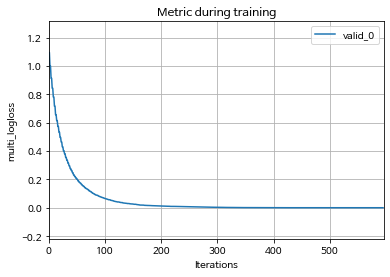

In [71]:
plot_metric(lgbmc)

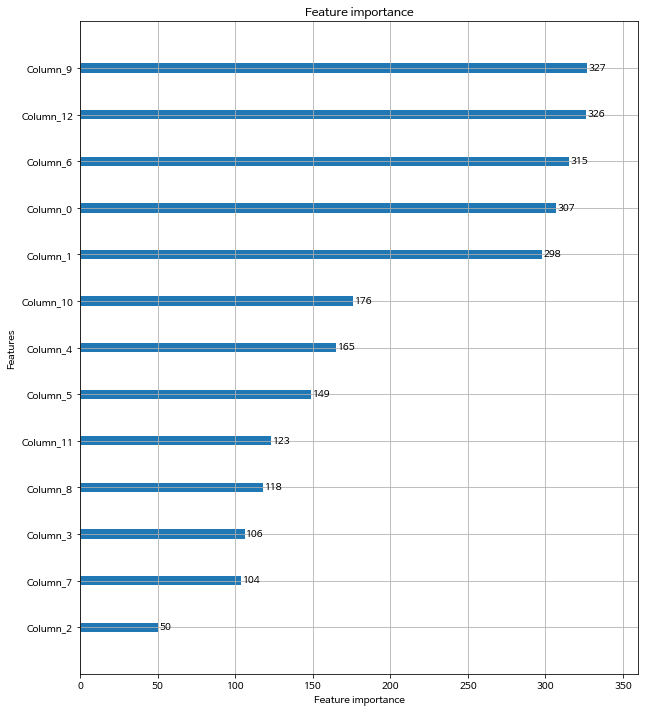

In [72]:
plot_importance(lgbmc, figsize=(10, 12))

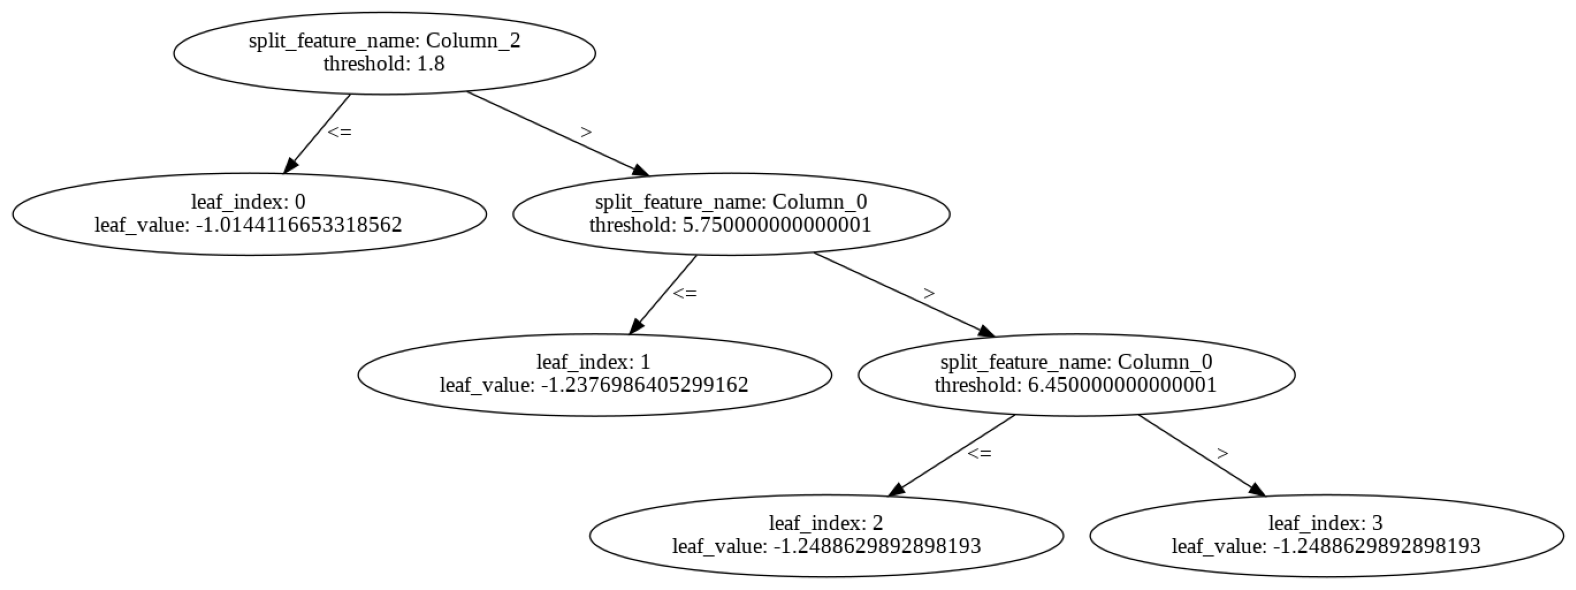

In [ ]:
plot_tree(lgbmc, figsize=(28, 24))

- 유방암 데이터셋

In [75]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state=123)

In [76]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.575665	valid_0's binary_logloss: 0.575665
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.513919	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383753	valid_0's binary_logloss: 0.383753
[6]	valid_0's binary_logloss: 0.352228	valid_0's binary_logloss: 0.352228
[7]	valid_0's binary_logloss: 0.326437	valid_0's binary_logloss: 0.326437
[8]	valid_0's binary_logloss: 0.302562	valid_0's binary_logloss: 0.302562
[9]	valid_0's binary_logloss: 0.278182	valid_0's binary_logloss: 0.278182
[10]	valid_0's binary_logloss: 0.261933	valid_0's binary_logloss: 0.261933
[11]	valid_0's binary_logloss: 0.245115	valid_0's binary_logloss: 0.245115
[12]	valid_0's binary_logloss: 0.228615	valid_0's binary_logloss: 0.228615
[13]	valid_0's binary_logloss: 0.215537	valid_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [90]:
cross_val = cross_validate(estimator=lgbmc, X=cancer.data, y=cancer.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.20393571853637696 (+/-0.004277440174352751)
avg score time : 0.0022099971771240234 (+/-8.722283609189368e-05)
avg test score : 0.9701288619779536 (+/-0.0180536992368202)


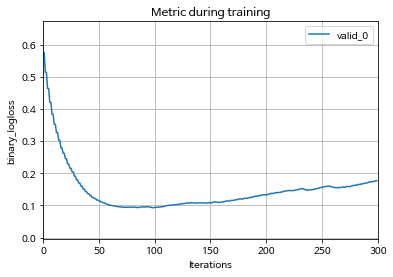

In [78]:
plot_metric(lgbmc)

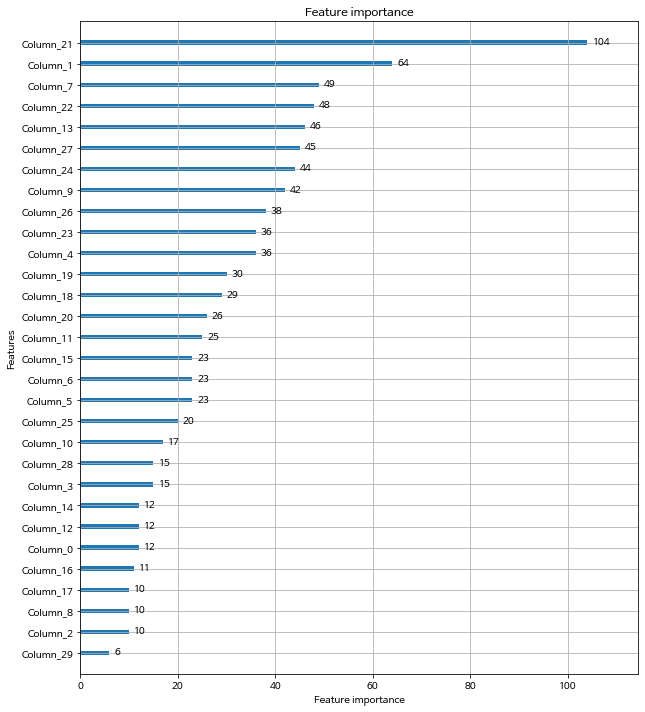

In [79]:
plot_importance(lgbmc, figsize=(10, 12))

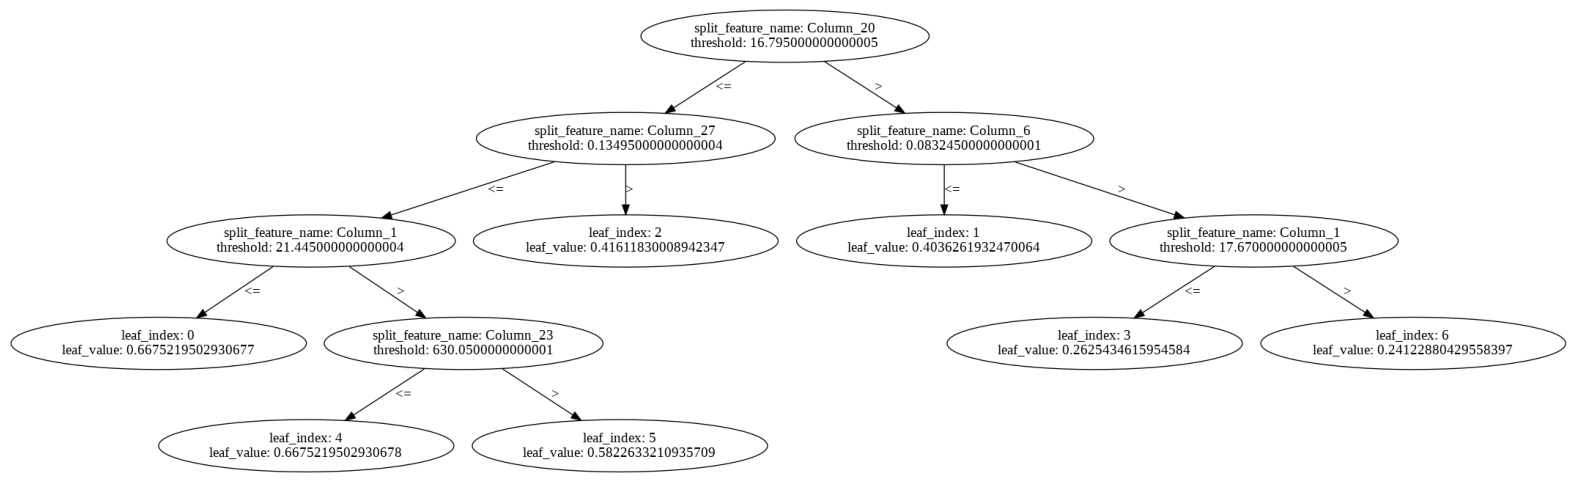

In [80]:
plot_tree(lgbmc, figsize=(28, 24))

#### 2) LGBMRegressor
- 보스턴 데이터

In [81]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state=123)

In [83]:
lgbmr = LGBMRegressor(n_estimators=400)

evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	va

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [89]:
cross_val = cross_validate(estimator=lgbmr, X=boston.data, y=boston.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.1626068115234375 (+/-0.006138366851167298)
avg score time : 0.0034550189971923827 (+/-0.0005042175093938829)
avg test score : 0.5692468252571979 (+/-0.2956636613238221)


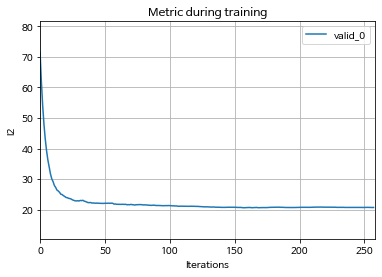

In [86]:
plot_metric(lgbmr)

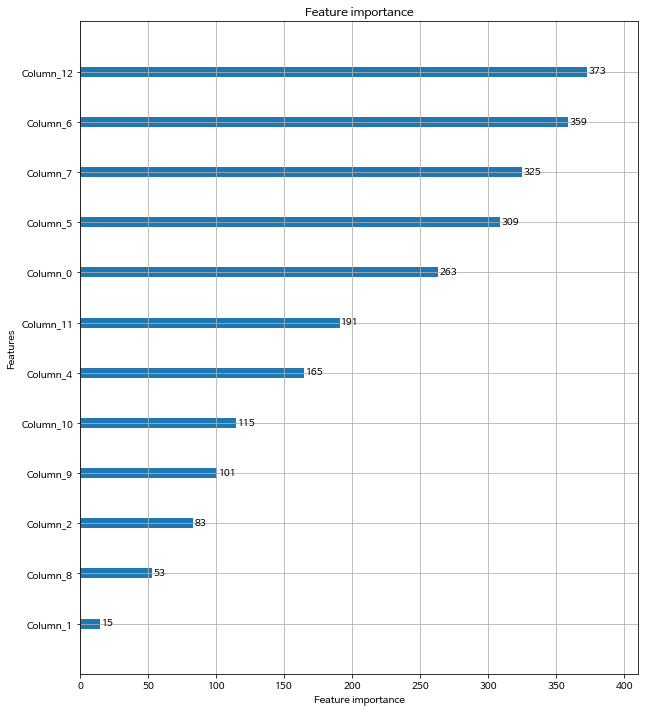

In [87]:
plot_importance(lgbmr, figsize=(10, 12))

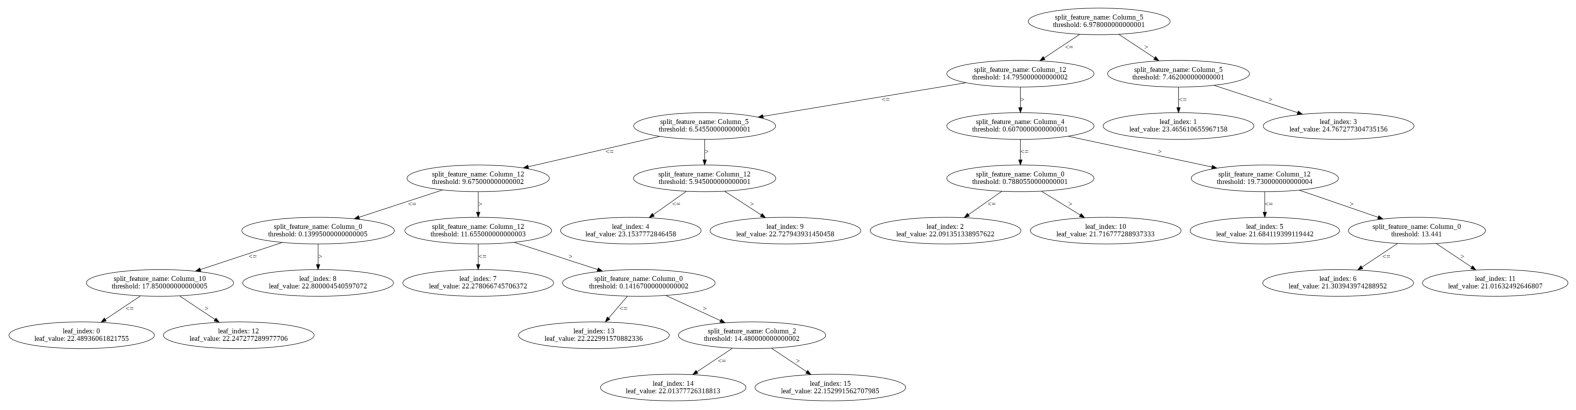

In [88]:
plot_tree(lgbmr, figsize=(28, 24))

- 당뇨병 데이터

In [95]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state=123)

In [96]:
lgbmr = LGBMRegressor(n_estimators=400)

evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

[1]	valid_0's l2: 5692.17
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [97]:
cross_val = cross_validate(estimator=lgbmr, X=diabetes.data, y=diabetes.target, cv=5)
cross_val

print("avg fit time : {} (+/-{})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/-{})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/-{})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.10739126205444335 (+/-0.0075264898524489724)
avg score time : 0.0029717445373535155 (+/-6.0903436865489e-05)
avg test score : 0.30867643947179507 (+/-0.07010708786960605)


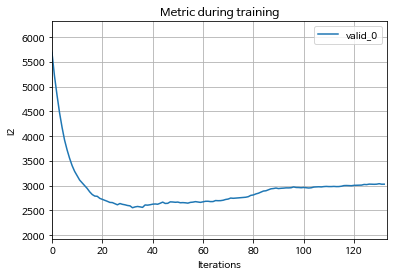

In [98]:
plot_metric(lgbmr)

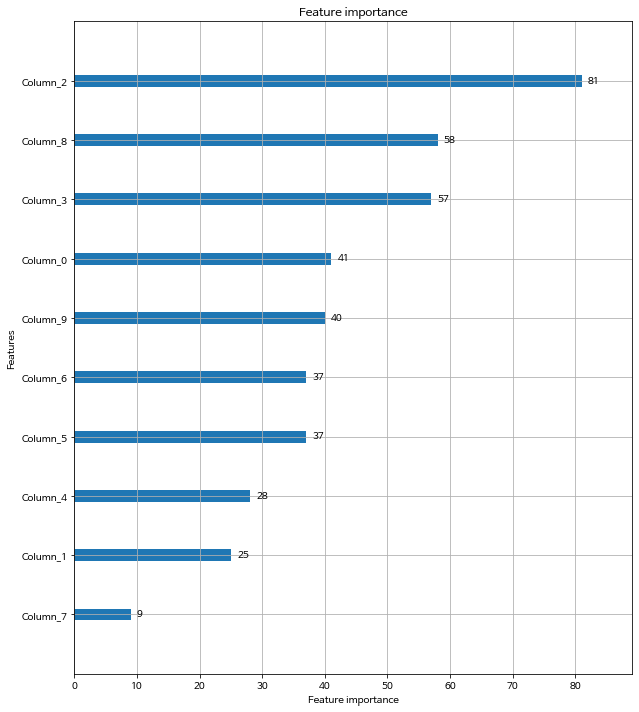

In [99]:
plot_importance(lgbmr, figsize=(10, 12))

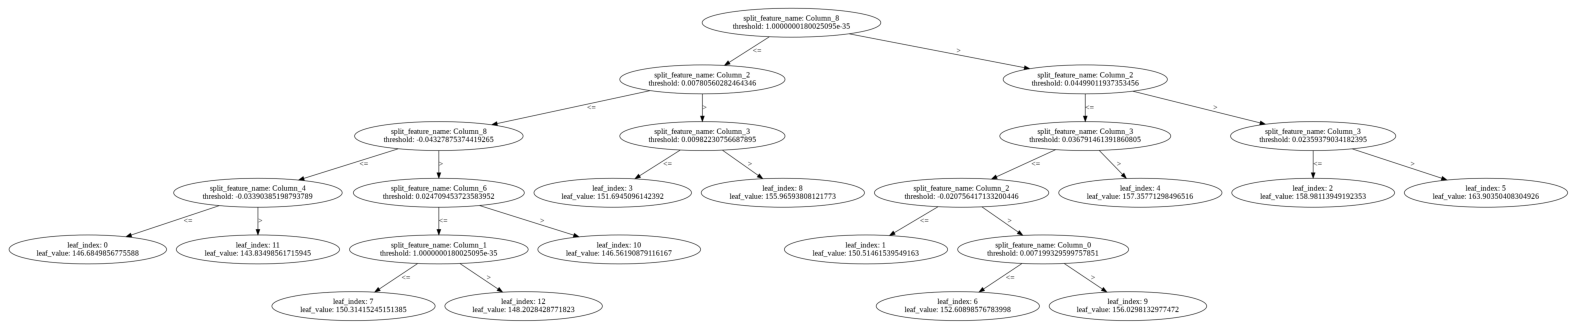

In [100]:
plot_tree(lgbmr, figsize=(28, 24))

# 4. Voting Classifier

In [102]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state=123)

In [103]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [104]:
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [105]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                              

In [106]:
preds = vo_clf.predict(X_test)
print("Voting 분류기 정확도 :", accuracy_score(y_test, preds))

Voting 분류기 정확도 : 0.9736842105263158


In [107]:
classifiers = [lr_clf, knn_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    class_name = clf.__class__.__name__
    print("{} 정확도 : {}".format(class_name, accuracy_score(y_test, preds)))

LogisticRegression 정확도 : 0.9824561403508771
KNeighborsClassifier 정확도 : 0.9649122807017544
